## Beta Diversity Measures

In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(plotly)

In [3]:
#Read in Data

batfecal_.00 = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batfecal_.00.rds")
batoral_.00 = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batoral_.00.rds")
batskin_.00 = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batskin_.00.rds")

bats_all = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_bats.00.rds")


In [4]:
# Weighted Unifrac
batfecal.00.dist.wunif = distance(batfecal_.00, method = "wunifrac", type = "samples")
batoral.00.dist.wunif = distance(batoral_.00, method = "wunifrac", type = "samples")
batskin.00.dist.wunif = distance(batskin_.00, method = "wunifrac", type = "samples")

# Unifrac
batfecal.00.dist.unif = distance(batfecal_.00, method = "unifrac", type = "samples")
batoral.00.dist.unif = distance(batoral_.00, method = "unifrac", type = "samples")
batskin.00.dist.unif = distance(batskin_.00, method = "unifrac", type = "samples")

# Bray-Curtis
batfecal.00.dist.bc = distance(batfecal_.00, method = "bray", type = "samples")
batoral.00.dist.bc = distance(batoral_.00, method = "bray", type = "samples")
batskin.00.dist.bc = distance(batskin_.00, method = "bray", type = "samples")


Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGCGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCTTGTAGGTGGCTTGTCGCGTCTGCCGTGAAAACCCGAGGCTCAACTTCGGGCGTGCGGTGGGTACGGGCAGGCTAGAGTGTGGTAGGGGAGACTGGAACTCCTGG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGGGCAAGCGTTGTCCGGAATCATTGGGCGTAAAGAGCTCGTAGGCGGTTCAGTAAGTCGGGTGTGAAAGCTCCGAGCTCAACTCGGAGAGGCCACTCGATACTGCTGTGACTAGAATCCAGTAGGGGAGCGTGGAACTCCTG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGATGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTCTTTAAGTCTGATGTGAAAGCCCCCAGCTCAACTGGGGAAGGTCATTGGAAACTGGGGAACTTGAGTGCAGAAGAGGAGAGTGGAATTCCACG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTAGGTGGCGAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAG

In [ ]:
batsall.00.dist.wunif = distance(bats_all, method = "wunifrac", type = "samples")
saveRDS(batsall.00.dist.wunif, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batsall.00.dist.wunif")

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGAAAGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGTAGGTGGTTATTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAGGGGCATCCAATACTGAGTAACTAGAGTATGGTAGAGGGAAGCGGAATTTCCAG -- in the phylogenetic tree in the data you provided.”

In [17]:
saveRDS(batfecal.00.dist.wunif, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batfecal.00.dist.wunif.rds")
saveRDS(batoral.00.dist.wunif, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batoral.00.dist.wunif.rds")
saveRDS(batskin.00.dist.wunif, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batskin.00.dist.wunif.rds")
saveRDS(batfecal.00.dist.unif, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batfecal.00.dist.unif.rds")
saveRDS(batoral.00.dist.unif, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batoral.00.dist.unif.rds")
saveRDS(batskin.00.dist.unif, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batskin.00.dist.unif.rds")
saveRDS(batfecal.00.dist.bc, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batfecal.00.dist.bc.rds")
saveRDS(batoral.00.dist.bc, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batoral.00.dist.bc.rds")
saveRDS(batskin.00.dist.bc, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batskin.00.dist.bc.rds")

In [7]:
#Convert to data frame from ADONIS tests

batfecal.df = data.frame(sample_data(batfecal_.00))
batoral.df = data.frame(sample_data(batoral_.00))
batskin.df = data.frame(sample_data(batskin_.00))

In [11]:
# WEIGHTED UNIFRAC - ADONIS

#Fecal
batfecal.00.wunif.adtest = adonis2(batfecal.00.dist.wunif ~ Host_Genus/Host_species + Ecto_status + Haem_status, strata= Locality, by = "margin", data=batfecal.df)
saveRDS(batfecal.00.wunif.adtest, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batfecal.00.wunif.adtest.rds")
#Oral
batoral.00.wunif.adtest = adonis2(batoral.00.dist.wunif ~ Host_Genus/Host_species + Ecto_status + Haem_status, strata= Locality, by = "margin", data=batoral.df)
saveRDS(batoral.00.wunif.adtest, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batoral.00.wunif.adtest.rds")
#Skin
batskin.00.wunif.adtest = adonis2(batskin.00.dist.wunif ~ Host_Genus/Host_species + Ecto_status + Haem_status, strata= Locality, by = "margin", data=batskin.df)
saveRDS(batskin.00.wunif.adtest, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batskin.00.wunif.adtest.rds")

# Dispersion permutests
fecal.beta.disp.wunif = betadisper(batfecal.00.dist.wunif,group = sample_data(batfecal_.00)$Ecto_status)
fecal.wunif.permutest = permutest(fecal.beta.disp.wunif)
oral.beta.disp.wunif = betadisper(batoral.00.dist.wunif,group = sample_data(batoral_.00)$Ecto_status)
oral.wunif.permutest = permutest(oral.beta.disp.wunif)
skin.beta.disp.wunif = betadisper(batskin.00.dist.wunif,group = sample_data(batskin_.00)$Ecto_status)
skin.wunif.permutest = permutest(skin.beta.disp.wunif)


#Print ADONIS results
batfecal.00.wunif.adtest
batoral.00.wunif.adtest
batskin.00.wunif.adtest

#Print Permutest results
fecal.wunif.permutest
oral.wunif.permutest
skin.wunif.permutest

,Df,SumOfSqs,F,Pr(>F)
Ecto_status,1,0.02346617,0.4683427,0.912
Haem_status,1,0.06707530,1.3387026,0.210
Host_Genus:Host_species,14,2.99531535,4.2700799,0.001
Residual,368,18.43853157,NA,NA


,Df,SumOfSqs,F,Pr(>F)
Ecto_status,1,0.01873268,0.506284,0.836
Haem_status,1,0.10289420,2.780900,0.015
Host_Genus:Host_species,14,3.53314448,6.820681,0.001
Residual,342,12.65411332,NA,NA


,Df,SumOfSqs,F,Pr(>F)
Ecto_status,1,0.11784861,2.4240780,0.010
Haem_status,1,0.04475801,0.9206465,0.513
Host_Genus:Host_species,18,6.72038477,7.6796909,0.001
Residual,420,20.41865746,NA,NA



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq  Mean Sq      F N.Perm Pr(>F)
Groups      2 0.0392 0.019616 1.2638    999   0.32
Residuals 399 6.1928 0.015521                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq  Mean Sq      F N.Perm Pr(>F)  
Groups      2 0.0973 0.048660 3.5024    999  0.024 *
Residuals 373 5.1822 0.013893                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df  Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups      2 0.00587 0.0029350 0.7121    999  0.496
Residuals 455 1.87544 0.0041218                     

In [13]:
# UNIFRAC - ADONIS

#Fecal
batfecal.00.unif.adtest = adonis2(batfecal.00.dist.unif ~ Host_Genus/Host_species + Ecto_status + Haem_status, strata= Locality, by = "margin", data=batfecal.df)
saveRDS(batfecal.00.unif.adtest, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batfecal.00.unif.adtest.rds")
#Oral
batoral.00.unif.adtest = adonis2(batoral.00.dist.unif ~ Host_Genus/Host_species + Ecto_status + Haem_status, strata= Locality, by = "margin", data=batoral.df)
saveRDS(batoral.00.unif.adtest, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batoral.00.unif.adtest.rds")
#Skin
batskin.00.unif.adtest = adonis2(batskin.00.dist.unif ~ Host_Genus/Host_species + Ecto_status + Haem_status, strata= Locality, by = "margin", data=batskin.df)
saveRDS(batskin.00.unif.adtest, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batskin.00.unif.adtest.rds")

# Dispersion permutests
fecal.beta.disp.unif = betadisper(batfecal.00.dist.unif,group = sample_data(batfecal_.00)$Ecto_status)
fecal.unif.permutest = permutest(fecal.beta.disp.unif)
oral.beta.disp.unif = betadisper(batoral.00.dist.unif,group = sample_data(batoral_.00)$Ecto_status)
oral.unif.permutest = permutest(oral.beta.disp.unif)
skin.beta.disp.unif = betadisper(batskin.00.dist.unif,group = sample_data(batskin_.00)$Ecto_status)
skin.unif.permutest = permutest(skin.beta.disp.unif)


#Print ADONIS results
batfecal.00.unif.adtest
batoral.00.unif.adtest
batskin.00.unif.adtest

#Print Permutest results
fecal.unif.permutest
oral.unif.permutest
skin.unif.permutest

,Df,SumOfSqs,F,Pr(>F)
Ecto_status,1,0.2930603,1.423283,0.048
Haem_status,1,0.2737993,1.329740,0.077
Host_Genus:Host_species,14,9.0932165,3.154452,0.001
Residual,368,75.7728183,NA,NA


,Df,SumOfSqs,F,Pr(>F)
Ecto_status,1,0.3226492,1.413664,0.057
Haem_status,1,0.2676828,1.172833,0.200
Host_Genus:Host_species,14,11.1984214,3.504648,0.001
Residual,342,78.0567605,NA,NA


,Df,SumOfSqs,F,Pr(>F)
Ecto_status,1,0.3240273,1.535668,0.020
Haem_status,1,0.2145459,1.016801,0.363
Host_Genus:Host_species,18,15.0999063,3.975736,0.001
Residual,420,88.6203678,NA,NA



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df  Sum Sq Mean Sq      F N.Perm Pr(>F)    
Groups      2 0.23789 0.11895 16.498    999  0.001 ***
Residuals 399 2.87663 0.00721                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df  Sum Sq  Mean Sq      F N.Perm Pr(>F)    
Groups      2 0.23376 0.116881 30.464    999  0.001 ***
Residuals 373 1.43110 0.003837                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df  Sum Sq   Mean Sq      F N.Perm Pr(>F)  
Groups      2 0.01677 0.0083841 3.7066    999  0.035 *
Residuals 455 1.02918 0.0022619                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [22]:
# BRAY-CURTIS - ADONIS

#Fecal
batfecal.00.bc.adtest = adonis2(batfecal.00.dist.bc ~ Host_Genus/Host_species + Ecto_status + Haem_status, strata= Locality, by = "margin", data=batfecal.df)
saveRDS(batfecal.00.bc.adtest, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batfecal.00.bc.adtest.rds")
#Oral
batoral.00.bc.adtest = adonis2(batoral.00.dist.bc ~ Host_Genus/Host_species + Ecto_status + Haem_status, strata= Locality, by = "margin", data=batoral.df)
saveRDS(batoral.00.bc.adtest, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batoral.00.bc.adtest.rds")
#Skin
batskin.00.bc.adtest = adonis2(batskin.00.dist.bc ~ Host_Genus/Host_species + Ecto_status + Haem_status, strata= Locality, by = "margin", data=batskin.df)
saveRDS(batskin.00.bc.adtest, file="/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batskin.00.bc.adtest.rds")

# Dispersion permutests
fecal.beta.disp.bc = betadisper(batfecal.00.dist.bc,group = sample_data(batfecal_.00)$Ecto_status)
fecal.bc.permutest = permutest(fecal.beta.disp.bc)
oral.beta.disp.bc = betadisper(batoral.00.dist.bc,group = sample_data(batoral_.00)$Ecto_status)
oral.bc.permutest = permutest(oral.beta.disp.bc)
skin.beta.disp.bc = betadisper(batskin.00.dist.bc,group = sample_data(batskin_.00)$Ecto_status)
skin.bc.permutest = permutest(skin.beta.disp.bc)


#Print ADONIS results
batfecal.00.bc.adtest
batoral.00.bc.adtest
batskin.00.bc.adtest

#Print Permutest results
fecal.bc.permutest
oral.bc.permutest
skin.bc.permutest

,Df,SumOfSqs,F,Pr(>F)
Ecto_status,1,0.4891323,1.397322,0.097
Haem_status,1,0.6932014,1.980294,0.011
Host_Genus:Host_species,14,14.1388007,2.885059,0.001
Residual,368,128.8183358,NA,NA


,Df,SumOfSqs,F,Pr(>F)
Ecto_status,1,0.2198949,0.9969949,0.447
Haem_status,1,0.4360239,1.9769152,0.019
Host_Genus:Host_species,14,20.6715554,6.6945728,0.001
Residual,342,75.4307378,NA,NA


,Df,SumOfSqs,F,Pr(>F)
Ecto_status,1,0.6275651,2.073251,0.001
Haem_status,1,0.3209062,1.060160,0.320
Host_Genus:Host_species,18,30.5358499,5.604421,0.001
Residual,420,127.1323505,NA,NA



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df  Sum Sq   Mean Sq     F N.Perm Pr(>F)
Groups      2 0.02195 0.0109769 1.905    999  0.168
Residuals 399 2.29915 0.0057623                    


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df  Sum Sq  Mean Sq      F N.Perm Pr(>F)    
Groups      2 0.11414 0.057071 31.655    999  0.001 ***
Residuals 373 0.67249 0.001803                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df  Sum Sq  Mean Sq      F N.Perm Pr(>F)    
Groups      2 0.16937 0.084683 85.707    999  0.001 ***
Residuals 455 0.44956 0.000988                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
saveRDS(fecal.wunif.permutest, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/batfecal.wunif.permutest.rds")
saveRDS(oral.wunif.permutest, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/batoral.wunif.permutest.rds")
saveRDS(skin.wunif.permutest, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/batskin.wunif.permutest.rds")
saveRDS(fecal.unif.permutest, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/batfecal.unif.permutest.rds")
saveRDS(oral.unif.permutest, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/batoral.unif.permutest.rds")
saveRDS(skin.unif.permutest, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/batskin.unif.permutest.rds")
saveRDS(fecal.bc.permutest, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/batfecal.bc.permutest.rds")
saveRDS(oral.bc.permutest, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/batoral.bc.permutest.rds")
saveRDS(skin.bc.permutest, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/batskin.bc.permutest.rds")

In [23]:
write.csv(batfecal.00.bc.adtest, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/batfecal.00.bc.adtest.csv")
write.csv(batoral.00.bc.adtest, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/batoral.00.bc.adtest.csv")
write.csv(batskin.00.bc.adtest, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/batskin.00.bc.adtest.csv")

In [26]:
# Bonferroni Corrections
pval = c("0.001", "0.048", "0.077")
corr.makact.ad.test = p.adjust(pval, method = "bonferroni")
corr.makact.ad.test

[1] 0.003 0.144 0.231

## Alpha Diversity Plots

### Weighted UniFrac

In [ ]:
bats_all = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_bats_.00.rds")
batsall.00.wunif.adtest = distance(bats_all, method = "wunifrac", type = "samples")
batsall.00.wunif.log = ordinate(batsall_.00, method = "PCoA", distance = "wunifrac")
batsall.00.wunif.evals = batsall.00.wunif.log$values$Eigenvalues
batsall.00.wunif.pcoa = plot_ordination(batsall_.00, batsall.00.wunif.log, color = "Locality") + ggtitle("Bat sall Wuf") + geom_point(size=2) + coord_fixed(sqrt(batsall.00.wunif.evals[2] / batsall.00.wunif.evals[1]))


In [ ]:
batfecal_.00 = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batfecal_.00.rds")
batfecal.00.wunif.adtest = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batfecal.00.wunif.adtest.rds")
batfecal.00.wunif.log = ordinate(batfecal_.00, method = "PCoA", distance = "wunifrac")
batfecal.00.wunif.evals = batfecal.00.wunif.log$values$Eigenvalues
batfecal.00.wunif.pcoa = plot_ordination(batfecal_.00, batfecal.00.wunif.log, color = "Locality") + ggtitle("Bat Fecal Wuf") + geom_point(size=2) + coord_fixed(sqrt(batfecal.00.wunif.evals[2] / batfecal.00.wunif.evals[1]))


In [ ]:
batoral_.00 = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batoral_.00.rds")
batoral.00.wunif.adtest = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batoral.00.wunif.adtest.rds")
batoral.00.wunif.log = ordinate(batoral_.00, method = "PCoA", distance = "wunifrac")
batoral.00.wunif.evals = batoral.00.wunif.log$values$Eigenvalues
batoral.00.wunif.pcoa = plot_ordination(batoral_.00, batoral.00.wunif.log, color = "Locality") + ggtitle("Bat Oral Wuf") + geom_point(size=2) + coord_fixed(sqrt(batoral.00.wunif.evals[2] / batoral.00.wunif.evals[1]))


In [ ]:
batskin_.00 = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batskin_.00.rds")
batskin.00.wunif.adtest = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batskin.00.wunif.adtest.rds")
batskin.00.wunif.log = ordinate(batskin_.00, method = "PCoA", distance = "wunifrac")
batskin.00.wunif.evals = batskin.00.wunif.log$values$Eigenvalues
batskin.00.wunif.pcoa = plot_ordination(batskin_.00, batskin.00.wunif.log, color = "Locality") + ggtitle("Bat Skin Wuf") + geom_point(size=2) + coord_fixed(sqrt(batskin.00.wunif.evals[2] / batskin.00.wunif.evals[1]))


### Unweighted UniFrac

In [ ]:
bats_all = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_bats_.00.rds")
batsall.00.wunif.adtest = distance(bats_all, method = "wunifrac", type = "samples")
batsall.00.wunif.log = ordinate(batsall_.00, method = "PCoA", distance = "wunifrac")
batsall.00.wunif.evals = batsall.00.wunif.log$values$Eigenvalues
batsall.00.wunif.pcoa = plot_ordination(batsall_.00, batsall.00.wunif.log, color = "Locality") + ggtitle("Bat sall Wuf") + geom_point(size=2) + coord_fixed(sqrt(batsall.00.wunif.evals[2] / batsall.00.wunif.evals[1]))


In [ ]:
batfecal_.00 = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batfecal_.00.rds")
batfecal.00.wunif.adtest = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batfecal.00.wunif.adtest.rds")
batfecal.00.wunif.log = ordinate(batfecal_.00, method = "PCoA", distance = "wunifrac")
batfecal.00.wunif.evals = batfecal.00.wunif.log$values$Eigenvalues
batfecal.00.wunif.pcoa = plot_ordination(batfecal_.00, batfecal.00.wunif.log, color = "Locality") + ggtitle("Bat Fecal Wuf") + geom_point(size=2) + coord_fixed(sqrt(batfecal.00.wunif.evals[2] / batfecal.00.wunif.evals[1]))


In [ ]:
batoral_.00 = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batoral_.00.rds")
batoral.00.wunif.adtest = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batoral.00.wunif.adtest.rds")
batoral.00.wunif.log = ordinate(batoral_.00, method = "PCoA", distance = "wunifrac")
batoral.00.wunif.evals = batoral.00.wunif.log$values$Eigenvalues
batoral.00.wunif.pcoa = plot_ordination(batoral_.00, batoral.00.wunif.log, color = "Locality") + ggtitle("Bat Oral Wuf") + geom_point(size=2) + coord_fixed(sqrt(batoral.00.wunif.evals[2] / batoral.00.wunif.evals[1]))


In [ ]:
batskin_.00 = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batskin_.00.rds")
batskin.00.wunif.adtest = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/adonis/batskin.00.wunif.adtest.rds")
batskin.00.wunif.log = ordinate(batskin_.00, method = "PCoA", distance = "wunifrac")
batskin.00.wunif.evals = batskin.00.wunif.log$values$Eigenvalues
batskin.00.wunif.pcoa = plot_ordination(batskin_.00, batskin.00.wunif.log, color = "Locality") + ggtitle("Bat Skin Wuf") + geom_point(size=2) + coord_fixed(sqrt(batskin.00.wunif.evals[2] / batskin.00.wunif.evals[1]))


## Plotting microbial community dissimilary against host phylogenetic divergence

### Fecal Microbial Dissimilarity * ML Branch Lengths

In [25]:
batfecal.00.dist.unif = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batfecal.00.dist.unif.rds")
#library(reshape)
#wuf_dist = melt(as.matrix(batfecal.00.dist.wunif))
uf_dist = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/batfecal_uf_dist.csv")

In [27]:
batfecal_ID = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/batfecal_IDs.csv")

In [37]:
names(batfecal.uf.2.df) <- c("X",  "c1", "Host_names", "uf_dist", "ST", "Host1")
head(batfecal.uf.2.df)

X,c1,Host_names,uf_dist,ST,Host1
1,PWW.3632.FecalFTA,PWW.3632.FecalFTA,0.0000000,FecalFTA,Rousettus_aegyptiacus
2,PWW.3635.FecalFTA,PWW.3632.FecalFTA,0.4919007,FecalFTA,Rousettus_aegyptiacus
3,PWW.3374.FecalFTA,PWW.3632.FecalFTA,0.6573002,FecalFTA,Triaenops_afer
4,JCK.10357.FecalFTA,PWW.3632.FecalFTA,0.5179268,FecalFTA,Rhinolophus_clivosus
5,PWW.3523.FecalFTA,PWW.3632.FecalFTA,0.6607082,FecalFTA,Hipposideros_caffer
6,PWW.3465.FecalFTA,PWW.3632.FecalFTA,0.6112565,FecalFTA,Rhinolophus_eloquens


In [28]:
names(batfecal_ID) <- c("Host_names", "X", "names")
head(batfecal_ID)

Host_names,X,names
BN.593.FecalFTA,FecalFTA,Chaerephon_bivitattus
BN.594.FecalFTA,FecalFTA,Chaerephon_bivitattus
BN.595.FecalFTA,FecalFTA,Chaerephon_bivitattus
BN.596.FecalFTA,FecalFTA,Chaerephon_bivitattus
BN.597.FecalFTA,FecalFTA,Chaerephon_bivitattus
BN.598.FecalFTA,FecalFTA,Chaerephon_bivitattus


In [38]:
batfecal.uf.2.df = inner_join(batfecal.uf.1.df, batfecal_ID, by="Host_names")

Warning message:
“Column `Host_names` joining factors with different levels, coercing to character vector”

In [39]:
#names(batfecal.wuf.1.df) <- c("C1", "Host_names", "wuf_dist", "ST", "names")
write.csv(batfecal.uf.2.df, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/batfecal_uf_dist_wnames.csv")

In [69]:
batfecal.unif = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/batfecal_uf_dist_wnames.csv")
branches = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/brlen.df.csv")

In [44]:
head(batfecal.unif)

Host_names,Host1,Host2,uf_dist
Rousettus_aegyptiacus_Rousettus_aegyptiacus,PWW.3632.FecalFTA,PWW.3632.FecalFTA,0.0000000
Rousettus_aegyptiacus_Rousettus_aegyptiacus,PWW.3635.FecalFTA,PWW.3632.FecalFTA,0.4919007
Triaenops_afer_Rousettus_aegyptiacus,PWW.3374.FecalFTA,PWW.3632.FecalFTA,0.6573002
Rhinolophus_clivosus_Rousettus_aegyptiacus,JCK.10357.FecalFTA,PWW.3632.FecalFTA,0.5179268
Hipposideros_caffer_Rousettus_aegyptiacus,PWW.3523.FecalFTA,PWW.3632.FecalFTA,0.6607082
Rhinolophus_eloquens_Rousettus_aegyptiacus,PWW.3465.FecalFTA,PWW.3632.FecalFTA,0.6112565


In [7]:
head(branches)

Host_names,brlen
Epomophorus_labiatus_Micropteropus_pusillus,0.01439787
Micropteropus_pusillus_Epomophorus_labiatus,0.01439787
Rhinolophus_clivosus_Rhinolophus_eloquens,0.03030532
Rhinolophus_eloquens_Rhinolophus_clivosus,0.03030532
Epomophorus_labiatus_Epomophorus_wahlbergi,0.05369780
Epomophorus_wahlbergi_Epomophorus_labiatus,0.05369780


In [70]:
batfecal_brlen.unif = inner_join(batfecal.unif, branches, by="Host_names")

Warning message:
“Column `Host_names` joining factors with different levels, coercing to character vector”

In [46]:
write.csv(batfecal_brlen.unif, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/batfecal_brlen.unif.csv")

In [71]:
avg_obs <- aggregate(uf_dist ~ Host_names, data = batfecal_brlen.unif, mean)

In [72]:
head(avg_obs)

Host_names,uf_dist
Coleura_afra_Epomophorus_labiatus,0.5826819
Coleura_afra_Epomophorus_wahlbergi,0.6235194
Coleura_afra_Hipposideros_caffer,0.6644229
Coleura_afra_Hipposideros_camerunensis,0.7257280
Coleura_afra_Hipposideros_ruber,0.6232086
Coleura_afra_Hipposideros_vittatus,0.6613455


In [73]:
batfecal_uf = inner_join(avg_obs, branches, by="Host_names")

Warning message:
“Column `Host_names` joining character vector and factor, coercing into character vector”

In [157]:
write.csv(batfecal_wuf, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles_for_final_plots/batfecal.wuf.brlen.csv")

Warning message:
“Computation failed in `stat_smooth()`:
object 'weight' not found”

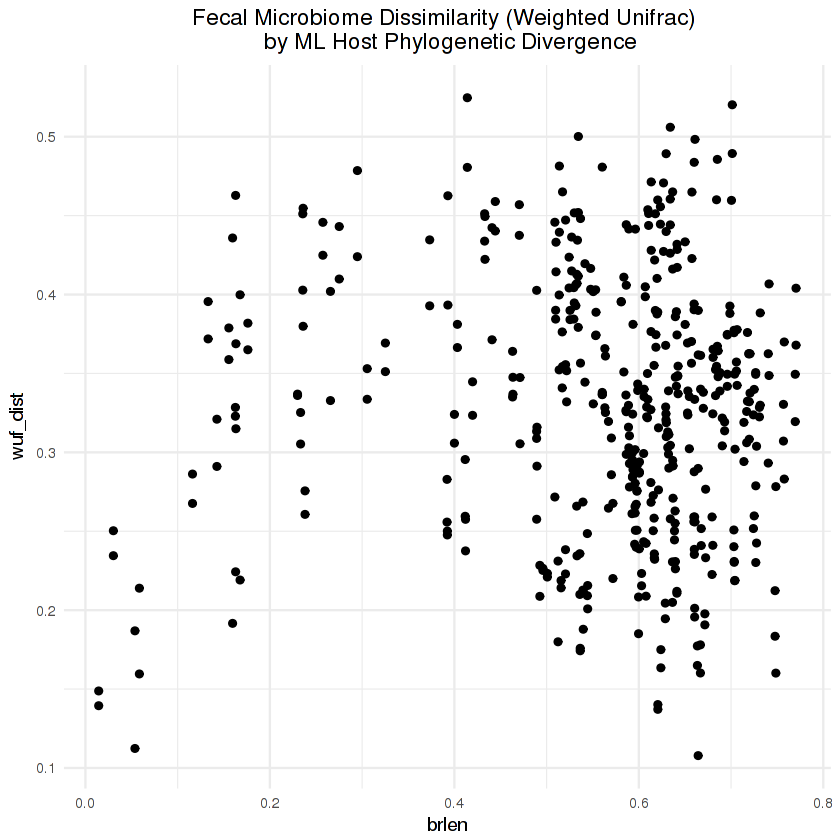

In [102]:
p = ggplot(batfecal_wuf, aes(x=brlen, y=wuf_dist)) + geom_point() + ggtitle("Fecal Microbiome Dissimilarity (Weighted Unifrac) \n by ML Host Phylogenetic Divergence")
p = p + geom_smooth(method = "", se=TRUE, alpha=0.2)
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p

In [75]:
fit <- lm(brlen ~ uf_dist, data = batfecal_uf)
summary(fit)


Call:
lm(formula = brlen ~ uf_dist, data = batfecal_uf)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51124 -0.05668  0.04475  0.10003  0.21898 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.31864    0.09565   3.331 0.000941 ***
uf_dist      0.34235    0.13610   2.515 0.012261 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1544 on 418 degrees of freedom
Multiple R-squared:  0.01491,	Adjusted R-squared:  0.01256 
F-statistic: 6.328 on 1 and 418 DF,  p-value: 0.01226


### Oral Microbial Dissimilarity * ML Branch Lengths

In [105]:
batoral.00.dist.wunif = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batoral.00.dist.wunif.rds")
#library(reshape)
#wuf_dist = melt(as.matrix(batoral.00.dist.wunif))
wuf_dist = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/batoral_wuf_dist.csv")

In [106]:
oral_IDs = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/oral_IDs.csv")

In [111]:
names(batoral.wuf.1.df) <- c("X", "Host_names","c1", "wuf_dist", "ST", "Host1")
head(batoral.wuf.1.df)

X,Host_names,c1,wuf_dist,ST,Host1
1,PWW.3622.TongueEtOH,PWW.3622.TongueEtOH,0.00000000,TongueEtOH,Rhinolophus_clivosus
2,PWW.3527.TongueEtOH,PWW.3622.TongueEtOH,0.08710737,TongueEtOH,Rhinolophus_clivosus
3,PWW.3512.TongueEtOH,PWW.3622.TongueEtOH,0.09645523,TongueEtOH,Rhinolophus_clivosus
4,JCK.10259.TongueEtOH,PWW.3622.TongueEtOH,0.23389499,TongueEtOH,Rhinolophus_clivosus
5,JCK.10329.TongueEtOH.2,PWW.3622.TongueEtOH,0.14436501,TongueEtOH,Rhinolophus_clivosus
6,PWW.3330.TongueEtOH,PWW.3622.TongueEtOH,0.14203208,TongueEtOH,Rhinolophus_clivosus


In [109]:
names(oral_IDs) <- c("Host_names", "X", "names")
head(oral_IDs)

Host_names,X,names
BN.593.TongueEtOH,TongueEtOH,Chaerephon_bivitattus
BN.594.TongueEtOH,TongueEtOH,Chaerephon_bivitattus
BN.595.TongueEtOH,TongueEtOH,Chaerephon_bivitattus
BN.596.TongueEtOH,TongueEtOH,Chaerephon_bivitattus
BN.597.TongueEtOH,TongueEtOH,Chaerephon_bivitattus
BN.598.TongueEtOH,TongueEtOH,Chaerephon_bivitattus


In [112]:
batoral.wuf.2.df = inner_join(batoral.wuf.1.df, oral_IDs, by="Host_names")
head(batoral.wuf.2.df)

Warning message:
“Column `Host_names` joining factors with different levels, coercing to character vector”

X.x,Host_names,c1,wuf_dist,ST,Host1,X.y,names
1,PWW.3622.TongueEtOH,PWW.3622.TongueEtOH,0.00000000,TongueEtOH,Rhinolophus_clivosus,TongueEtOH,Rhinolophus_clivosus
2,PWW.3527.TongueEtOH,PWW.3622.TongueEtOH,0.08710737,TongueEtOH,Rhinolophus_clivosus,TongueEtOH,Hipposideros_caffer
3,PWW.3512.TongueEtOH,PWW.3622.TongueEtOH,0.09645523,TongueEtOH,Rhinolophus_clivosus,TongueEtOH,Hipposideros_caffer
4,JCK.10259.TongueEtOH,PWW.3622.TongueEtOH,0.23389499,TongueEtOH,Rhinolophus_clivosus,TongueEtOH,Myotis_tricolor
5,JCK.10329.TongueEtOH.2,PWW.3622.TongueEtOH,0.14436501,TongueEtOH,Rhinolophus_clivosus,TongueEtOH,Epomophorus_wahlbergi
6,PWW.3330.TongueEtOH,PWW.3622.TongueEtOH,0.14203208,TongueEtOH,Rhinolophus_clivosus,TongueEtOH,Otomops_martiensseni


In [114]:
names(batoral.wuf.2.df) <- c("X", "Host1","Host2","uf_dist","ST","Hostname1","ST","Hostname2")
write.csv(batoral.wuf.2.df, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/batoral_Wuf_dist_wnames.csv")

In [127]:
write.csv(batoral_wuf, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/batoral_Wuf_dist_wnames.csv")
head(batoral_wuf)

Host_names,Host1,Host2,wuf_dist
Rhinolophus_clivosus_Rhinolophus_clivosus,PWW.3622.TongueEtOH,PWW.3622.TongueEtOH,0.00000000
Rhinolophus_clivosus_Hipposideros_caffer,PWW.3527.TongueEtOH,PWW.3622.TongueEtOH,0.08710737
Rhinolophus_clivosus_Hipposideros_caffer,PWW.3512.TongueEtOH,PWW.3622.TongueEtOH,0.09645523
Rhinolophus_clivosus_Myotis_tricolor,JCK.10259.TongueEtOH,PWW.3622.TongueEtOH,0.23389499
Rhinolophus_clivosus_Epomophorus_wahlbergi,JCK.10329.TongueEtOH.2,PWW.3622.TongueEtOH,0.14436501
Rhinolophus_clivosus_Otomops_martiensseni,PWW.3330.TongueEtOH,PWW.3622.TongueEtOH,0.14203208


In [128]:
batoral_wunif.brlen = inner_join(batoral_wuf, branches, by ="Host_names")
head(batoral_wunif.brlen)

Warning message:
“Column `Host_names` joining factors with different levels, coercing to character vector”

Host_names,Host1,Host2,wuf_dist,brlen
Rhinolophus_clivosus_Hipposideros_caffer,PWW.3527.TongueEtOH,PWW.3622.TongueEtOH,0.08710737,0.3920276
Rhinolophus_clivosus_Hipposideros_caffer,PWW.3512.TongueEtOH,PWW.3622.TongueEtOH,0.09645523,0.3920276
Rhinolophus_clivosus_Myotis_tricolor,JCK.10259.TongueEtOH,PWW.3622.TongueEtOH,0.23389499,0.7030223
Rhinolophus_clivosus_Epomophorus_wahlbergi,JCK.10329.TongueEtOH.2,PWW.3622.TongueEtOH,0.14436501,0.5360604
Rhinolophus_clivosus_Myotis_tricolor,JCK.10029.TongueEtOH,PWW.3622.TongueEtOH,0.25986632,0.7030223
Rhinolophus_clivosus_Hipposideros_vittatus,PWW.3424.TongueEtOH.1,PWW.3622.TongueEtOH,0.28039450,0.4631255


In [129]:
avg_obs <- aggregate(wuf_dist ~ Host_names, data = batoral_wunif.brlen, mean)

In [130]:
head(batoral_wuf)

Host_names,Host1,Host2,wuf_dist
Rhinolophus_clivosus_Rhinolophus_clivosus,PWW.3622.TongueEtOH,PWW.3622.TongueEtOH,0.00000000
Rhinolophus_clivosus_Hipposideros_caffer,PWW.3527.TongueEtOH,PWW.3622.TongueEtOH,0.08710737
Rhinolophus_clivosus_Hipposideros_caffer,PWW.3512.TongueEtOH,PWW.3622.TongueEtOH,0.09645523
Rhinolophus_clivosus_Myotis_tricolor,JCK.10259.TongueEtOH,PWW.3622.TongueEtOH,0.23389499
Rhinolophus_clivosus_Epomophorus_wahlbergi,JCK.10329.TongueEtOH.2,PWW.3622.TongueEtOH,0.14436501
Rhinolophus_clivosus_Otomops_martiensseni,PWW.3330.TongueEtOH,PWW.3622.TongueEtOH,0.14203208


In [131]:
batoral_wuf = inner_join(avg_obs, branches, by="Host_names")

Warning message:
“Column `Host_names` joining character vector and factor, coercing into character vector”

In [132]:
write.csv(batoral_wuf, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles_for_final_plots/batoral.wuf.brlen.csv")

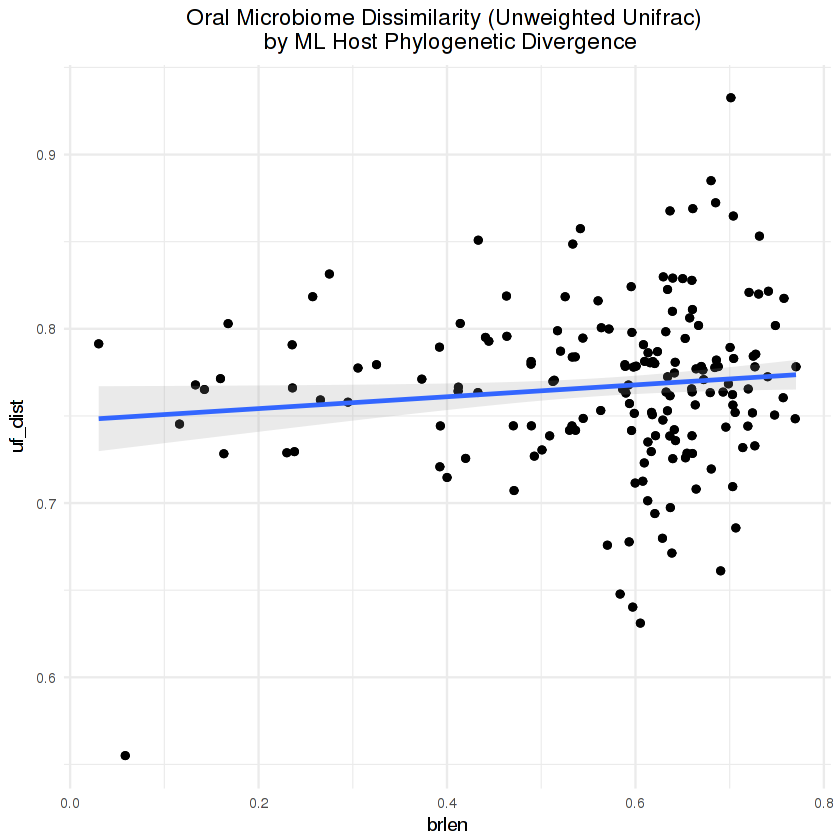

In [156]:
p = ggplot(batoral_uf, aes(x=brlen, y=uf_dist)) + geom_point() + ggtitle("Oral Microbiome Dissimilarity (Unweighted Unifrac) \n by ML Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm", se=TRUE, alpha=.2)
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p

In [155]:
fit <- lm(brlen ~ wuf_dist, data = batoral_wuf)
summary(fit)


Call:
lm(formula = brlen ~ wuf_dist, data = batoral_wuf)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54353 -0.04756  0.05091  0.09528  0.20407 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.60892    0.03713  16.401   <2e-16 ***
wuf_dist    -0.12064    0.10790  -1.118    0.264    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1555 on 340 degrees of freedom
Multiple R-squared:  0.003663,	Adjusted R-squared:  0.000733 
F-statistic:  1.25 on 1 and 340 DF,  p-value: 0.2643


### Skin Microbial Dissimilarity * ML Branch Lengths

In [134]:
batskin.00.dist.wunif = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/batskin.00.dist.wunif.rds")
#library(reshape)
#skinwuf_dist = melt(as.matrix(batskin.00.dist.wunif))
skinwuf_dist = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/batskin_wuf_dist.csv")

In [88]:
skin_IDs = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/skin_IDs.csv")

In [140]:
names(batskin.wuf.1.df) <- c("x", "c1", "Host_names","uf_dist", "ST", "Host1")
head(batskin.wuf.1.df)

x,c1,Host_names,uf_dist,ST,Host1
1,PWW.3575.SkinEtOH,PWW.3575.SkinEtOH,0.0000000,SkinEtOH,Otomops_martiensseni
2,JCK.10068.SkinEtOH,PWW.3575.SkinEtOH,0.4461969,SkinEtOH,Rhinolophus_hildebrandti
3,JCK.10106.SkinEtOH,PWW.3575.SkinEtOH,0.4957211,SkinEtOH,Rhinolophus_clivosus
4,JCK.10033.SkinEtOH,PWW.3575.SkinEtOH,0.4321164,SkinEtOH,Rousettus_aegyptiacus
5,BN.597.SkinEtOH,PWW.3575.SkinEtOH,0.3770994,SkinEtOH,Chaerephon_bivitattus
6,PWW.3512.SkinEtOH,PWW.3575.SkinEtOH,0.4527211,SkinEtOH,Hipposideros_caffer


In [90]:
names(skin_IDs) <- c("Host_names", "X", "names")
head(skin_IDs)

Host_names,X,names
BN.593.SkinEtOH,SkinEtOH,Chaerephon_bivitattus
BN.594.SkinEtOH,SkinEtOH,Chaerephon_bivitattus
BN.595.SkinEtOH,SkinEtOH,Chaerephon_bivitattus
BN.596.SkinEtOH,SkinEtOH,Chaerephon_bivitattus
BN.597.SkinEtOH,SkinEtOH,Chaerephon_bivitattus
BN.598.SkinEtOH,SkinEtOH,Chaerephon_bivitattus


In [141]:
batskin.wuf.2.df = inner_join(batskin.wuf.1.df, skin_IDs, by="Host_names")
head(batskin.wuf.2.df)

Warning message:
“Column `Host_names` joining factors with different levels, coercing to character vector”

x,c1,Host_names,uf_dist,ST,Host1,X,names
1,PWW.3575.SkinEtOH,PWW.3575.SkinEtOH,0.0000000,SkinEtOH,Otomops_martiensseni,SkinEtOH,Otomops_martiensseni
2,JCK.10068.SkinEtOH,PWW.3575.SkinEtOH,0.4461969,SkinEtOH,Rhinolophus_hildebrandti,SkinEtOH,Otomops_martiensseni
3,JCK.10106.SkinEtOH,PWW.3575.SkinEtOH,0.4957211,SkinEtOH,Rhinolophus_clivosus,SkinEtOH,Otomops_martiensseni
4,JCK.10033.SkinEtOH,PWW.3575.SkinEtOH,0.4321164,SkinEtOH,Rousettus_aegyptiacus,SkinEtOH,Otomops_martiensseni
5,BN.597.SkinEtOH,PWW.3575.SkinEtOH,0.3770994,SkinEtOH,Chaerephon_bivitattus,SkinEtOH,Otomops_martiensseni
6,PWW.3512.SkinEtOH,PWW.3575.SkinEtOH,0.4527211,SkinEtOH,Hipposideros_caffer,SkinEtOH,Otomops_martiensseni


In [142]:
names(batskin.wuf.2.df) <- c("X", "Host1","Host2","uf_dist","ST","Hostname1","ST","Hostname2")
write.csv(batskin.wuf.2.df, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/batskin_Wuf_dist_wnames.csv")

In [149]:
batskin.wunif = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/batskin_Wuf_dist_wnames.csv")

In [150]:
batskin_wunif.brlen = inner_join(batskin.wunif, branches, by ="Host_names")
head(batskin_wunif.brlen)

Warning message:
“Column `Host_names` joining factors with different levels, coercing to character vector”

Host_names,Host1,Host2,wuf_dist,brlen
Rousettus_aegyptiacus_Rhinolophus_clivosus,JCK.10033.SkinEtOH,JCK.10106.SkinEtOH,0.3677657,0.64214773
Hipposideros_caffer_Rhinolophus_clivosus,PWW.3512.SkinEtOH,JCK.10106.SkinEtOH,0.2963584,0.39202758
Miniopterus_africanus_Rhinolophus_clivosus,PWW.3429.SkinEtOH,JCK.10106.SkinEtOH,0.4258942,0.63924587
Rhinolophus_eloquens_Rhinolophus_clivosus,PWW.3542.SkinEtOH,JCK.10106.SkinEtOH,0.5197323,0.03030532
Hipposideros_ruber_Rhinolophus_clivosus,PWW.3554.SkinEtOH,JCK.10106.SkinEtOH,0.3012834,0.41173543
Miniopterus_natalensis_Rhinolophus_clivosus,PWW.3455.SkinEtOH,JCK.10106.SkinEtOH,0.3743215,0.63215826


In [151]:
skin_avg_obs <- aggregate(wuf_dist ~ Host_names, data = batskin_wunif.brlen, mean)
batskin_wuf = inner_join(skin_avg_obs, branches, by="Host_names")

Warning message:
“Column `Host_names` joining character vector and factor, coercing into character vector”

In [152]:
write.csv(batskin_wuf, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles_for_final_plots/batskin.wuf.brlen.csv")

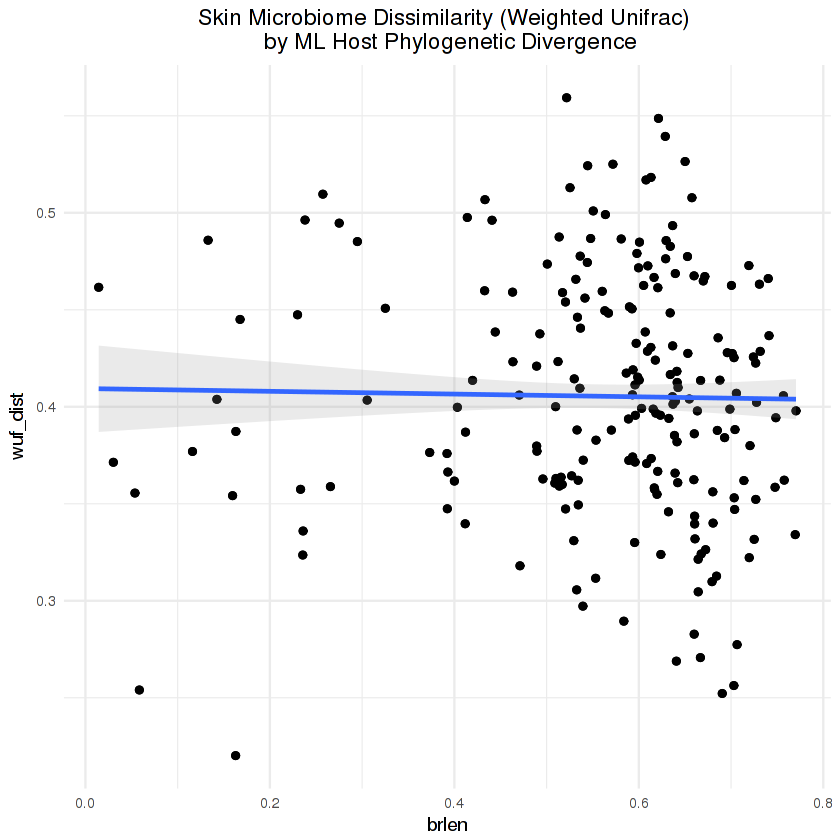

In [153]:
p = ggplot(batskin_wuf, aes(x=brlen, y=wuf_dist)) + geom_point() + ggtitle("Skin Microbiome Dissimilarity (Weighted Unifrac) \n by ML Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm", se=TRUE, alpha=.2)
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p

In [154]:
fit <- lm(log(brlen) ~ wuf_dist, data = batskin_wuf)
summary(fit)


Call:
lm(formula = log(brlen) ~ wuf_dist, data = batskin_wuf)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5919 -0.0024  0.1497  0.2524  0.4191 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.7657     0.1622  -4.721  3.2e-06 ***
wuf_dist      0.2534     0.3952   0.641    0.522    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5145 on 418 degrees of freedom
Multiple R-squared:  0.0009827,	Adjusted R-squared:  -0.001407 
F-statistic: 0.4112 on 1 and 418 DF,  p-value: 0.5217
